# RETAIL SALES

## 1- Exploracion inicial y Limpieza

In [229]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [230]:
# Descargar el dataset
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

# Obtener el nombre del archivo directamente (primer archivo del directorio)
dataset_file = os.listdir(path)[0]  # Supone que hay un único archivo

# Crear la ruta completa al archivo
dataset_path = os.path.join(path, dataset_file)

# Cargar el archivo como un DataFrame
df = pd.read_csv(dataset_path)  # Si es CSV
# df = pd.read_excel(dataset_path)  # Si es Excel

In [231]:
# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(1000, 9)

In [232]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [233]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [234]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [235]:
# Se elimina la columna de transaction_id porque no es relevante para el análisis
# Cambiar tipo de datos de la fecha que está como object a tipo de dato de fecha
df = df.drop('Transaction ID', axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [236]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,Date,Age,Quantity,Price per Unit,Total Amount
count,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,NaN,13.68143,1.132734,189.681356,559.997632


In [237]:
# Estadísticas descriptivas de columnas categóricas
df.describe(include=['object'])  # Muestra estadísticas descriptivas (conteo, valores únicos, categoría más frecuente) para variables categóricas.

,Customer ID,Gender,Product Category
count,1000,1000,1000
unique,1000,2,3
top,CUST1000,Female,Clothing
freq,1,510,351


In [238]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [239]:
# Inspección de nombres de columnas
df.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.

Index(['Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [240]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(0)

In [241]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

int64             4
object            3
datetime64[ns]    1
Name: count, dtype: int64

In [242]:
# Distribución de valores en columnas categóricas
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())  # Muestra la frecuencia de cada categoría en las columnas categóricas.

Customer ID
CUST1000    1
CUST001     1
CUST002     1
CUST003     1
CUST004     1
           ..
CUST013     1
CUST012     1
CUST011     1
CUST010     1
CUST009     1
Name: count, Length: 1000, dtype: int64
Gender
Female    510
Male      490
Name: count, dtype: int64
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


## Exploración detallada

C:\Users\sebac\AppData\Local\Temp\ipykernel_29552\650120150.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[df.select_dtypes(include='number').columns].resample('M').mean().plot()


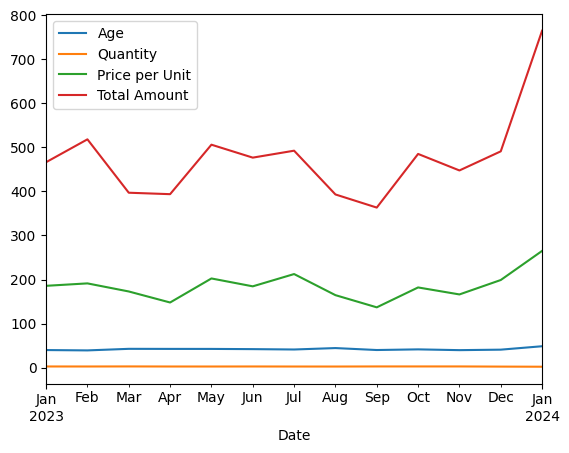

In [243]:
# Análisis de tendencia temporal (para columna de fecha)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df[df.select_dtypes(include='number').columns].resample('M').mean().plot()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Price per Unit'}>,
        <Axes: title={'center': 'Total Amount'}>]], dtype=object)

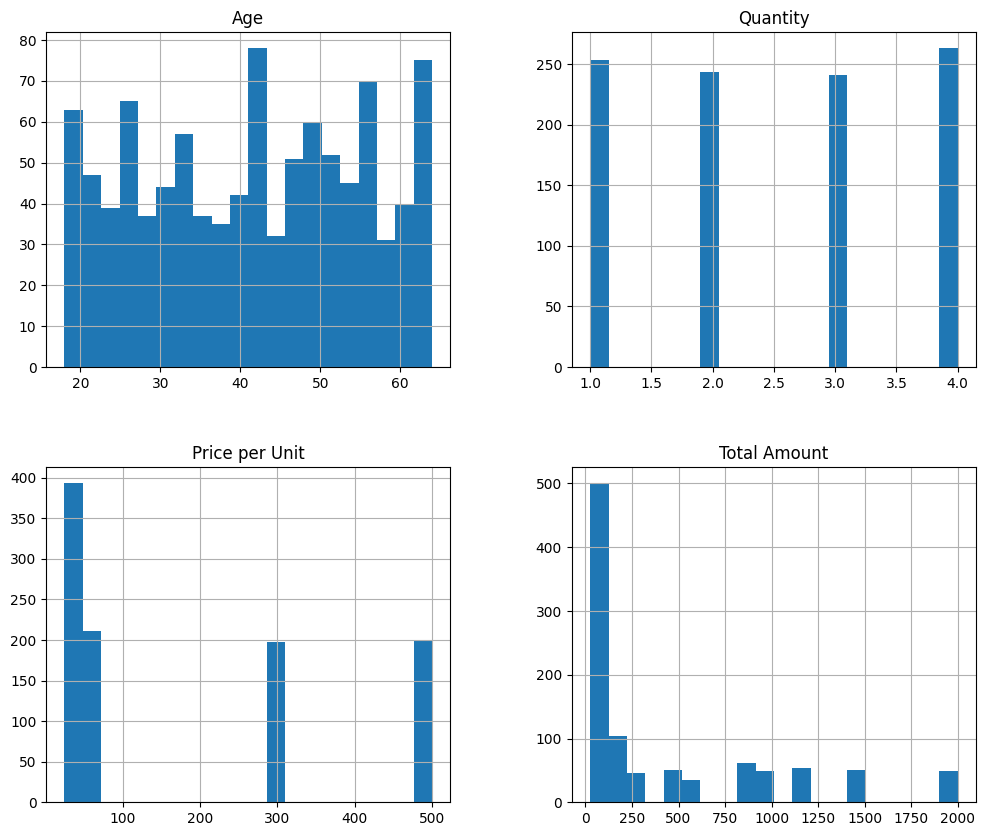

In [244]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=20)  # Crea histogramas para todas las columnas numéricas.

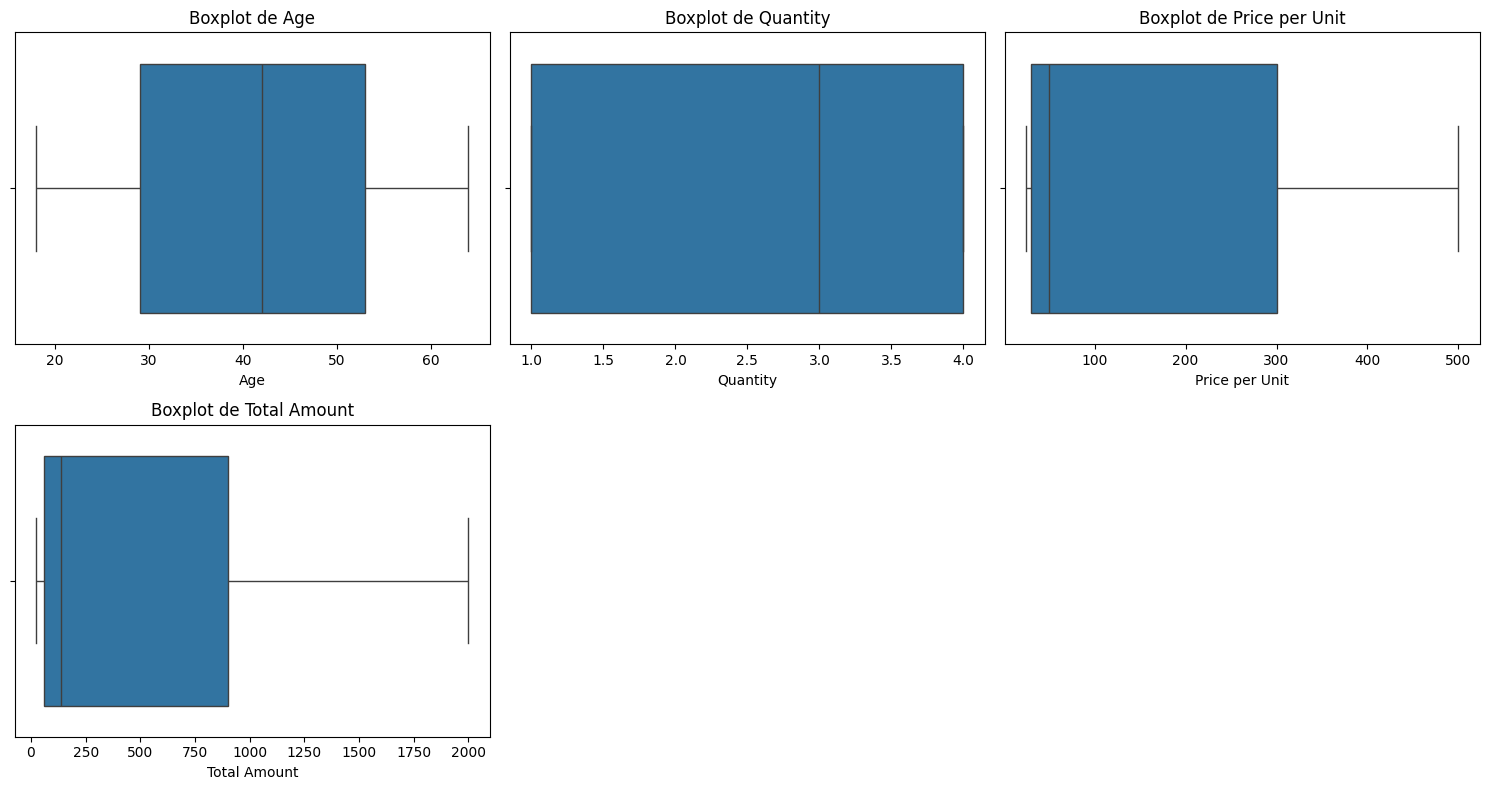

In [245]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [246]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")


Age - Número de outliers: 0

Quantity - Número de outliers: 0

Price per Unit - Número de outliers: 0

Total Amount - Número de outliers: 0


<Axes: >

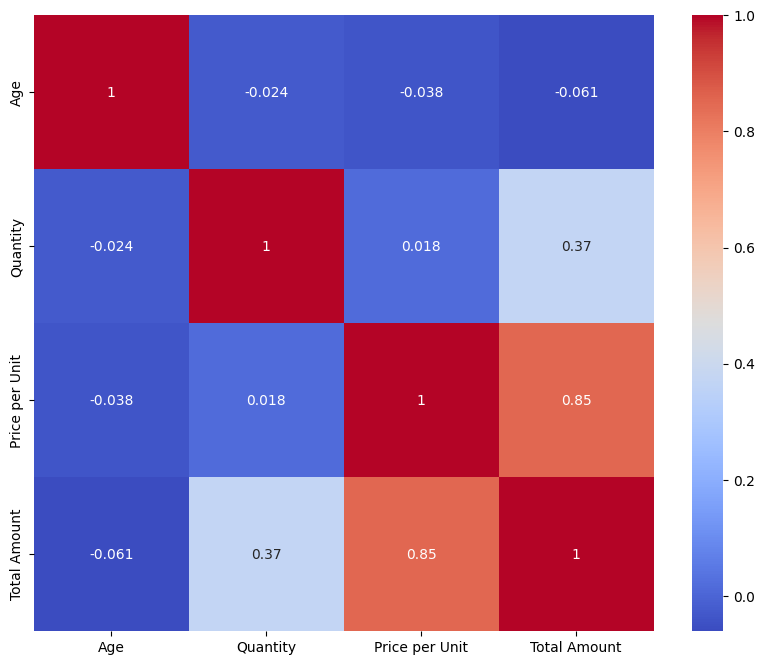

In [247]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

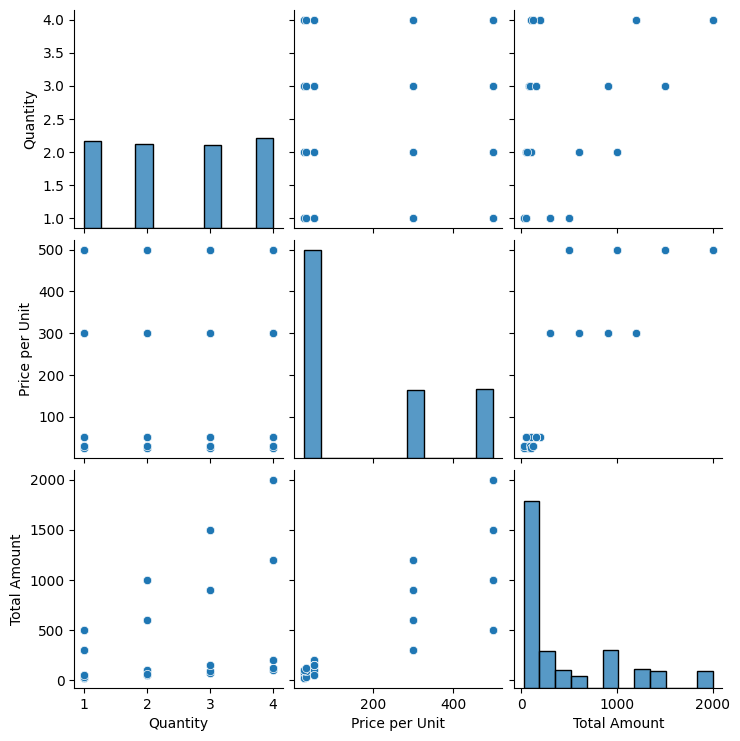

In [248]:
# Distribución por pares de variables (usando un pairplot)

# Paso 1: Filtra las variables que tienen una correlación alta (por ejemplo, superior a 0.6 en valor absoluto) Se debe ajustar segun necesidad
threshold = 0.3
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Paso 2: Selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Paso 3: Genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df[correlated_vars]) # Muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

## Pre-procesamiento

## Entrenamiento

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(["Total Amount"], axis=1) # Features
y = df["Total Amount"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas

numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()
# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [249]:
# DECISION TREE para regresion
from sklearn.tree import DecisionTreeRegressor

# Crear un Pipeline completo
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(random_state=0))
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_dt.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_dt = pipeline_dt.predict(X_test)

# Calcular la precisión del modelo
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Resultado del R2 de Desicion Tree: {r2_dt}")
print(f"Resultado del MSE de Desicion Tree: {mse_dt}")

Resultado del R2 de Desicion Tree: 1.0
Resultado del MSE de Desicion Tree: 0.0


In [250]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Crear un Pipeline completo
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_rf.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_rf = pipeline_rf.predict(X_test)

# Calcular la precisión del modelo
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Resultado del R2 de Random Forest: {r2_rf}")
print(f"Resultado del MSE de Random Forest: {mse_rf}")

Resultado del R2 de Random Forest: 1.0
Resultado del MSE de Random Forest: 0.0


In [252]:
# LINEAR REGRESSION

# Crear un Pipeline completo
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_lr.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_lr = pipeline_lr.predict(X_test)

# Calcular la precisión del modelo
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Resultado del R2 de Linear Regression: {r2_lr}")
print(f"Resultado del MSE de Linear Regression: {mse_lr}")

Resultado del R2 de Linear Regression: 0.8569092472404122
Resultado del MSE de Linear Regression: 41886.83979407753


In [253]:
# Entrenamiento del modelo KNN para regresion
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Crear un Pipeline con el preprocesador y el regressor
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Asegúrate de tener el preprocesador definido
    ('knn', KNeighborsRegressor())  # Aquí inicializamos el modelo KNN sin el parámetro 'n_neighbors'
])

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    # Ajustar el número de vecinos en cada iteración
    pipeline_knn.set_params(knn__n_neighbors=k)
    
    # Validación cruzada con 5 pliegues
    scores = cross_val_score(pipeline_knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    
    # Guardar el promedio del MSE (recuerda que cross_val_score devuelve negativos)
    mse_scores.append(np.mean(scores))

# Seleccionar el K con el menor MSE (máximo valor negativo)
best_k = k_values[np.argmax(mse_scores)]
print(f'Mejor valor de K: {best_k}')

# Ahora, usa el mejor K encontrado para entrenar el modelo final
pipeline_knn.set_params(knn__n_neighbors=best_k)
pipeline_knn.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_knn = pipeline_knn.predict(X_test)

# Calcular y mostrar las métricas
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Resultado del R2 del KNN: {r2_knn}")
print(f"Resultado del MSE del KNN: {mse_knn}")

Mejor valor de K: 2
Resultado del R2 del KNN: 0.9798583033336913
Resultado del MSE del KNN: 5896.0625


In [254]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'R2': [r2_lr, r2_knn, r2_dt, r2_rf],
    'MSE': [mse_lr, mse_knn, mse_dt, mse_rf]
})

# Imprimir los resultados
print(results)

               Model        R2           MSE
0  Linear Regression  0.856909  41886.839794
1                KNN  0.979858   5896.062500
2      Decision Tree  1.000000      0.000000
3      Random Forest  1.000000      0.000000


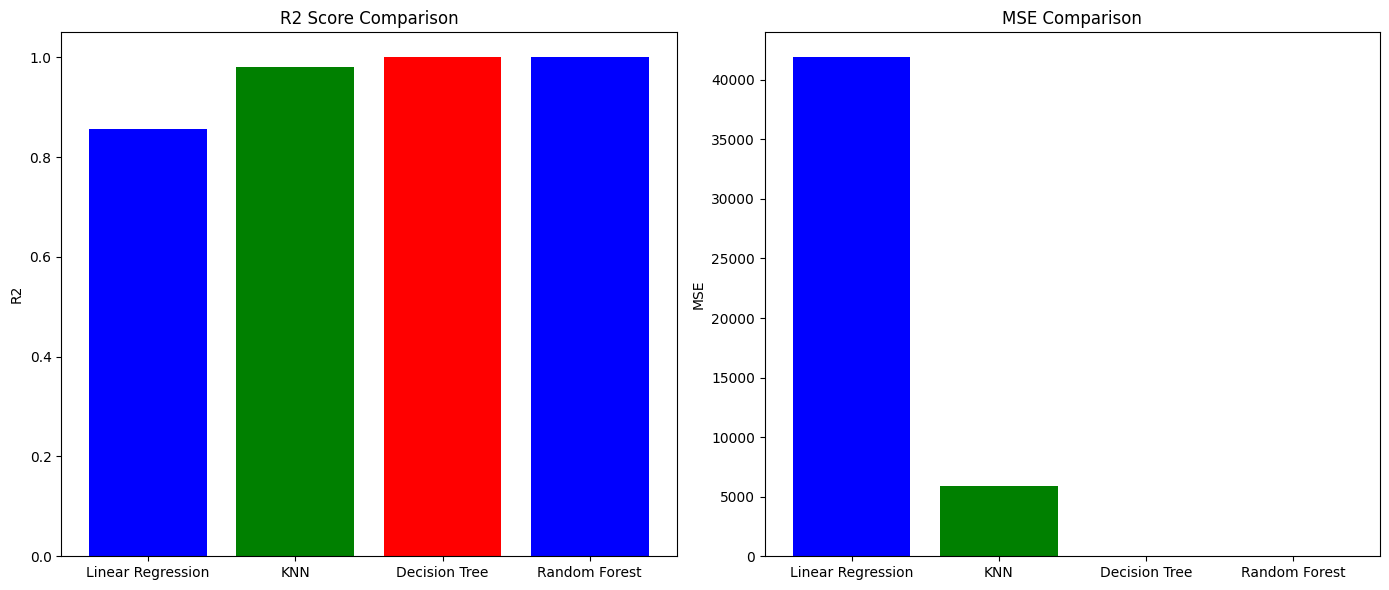

In [255]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Graficar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de R2
ax[0].bar(results['Model'], results['R2'], color=['blue', 'green', 'red'])
ax[0].set_title('R2 Score Comparison')
ax[0].set_ylabel('R2')

# Gráfico de MSE
ax[1].bar(results['Model'], results['MSE'], color=['blue', 'green', 'red'])
ax[1].set_title('MSE Comparison')
ax[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()

In [256]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_lr = measure_training_time(pipeline_lr, X_train, y_train)
time_knn = measure_training_time(pipeline_knn, X_train, y_train)
time_dt = measure_training_time(pipeline_dt, X_train, y_train)
time_rf = measure_training_time(pipeline_rf, X_train, y_train)

# Agregar el tiempo al DataFrame
results['Training Time (s)'] = [time_lr, time_knn, time_dt, time_rf]

# Imprimir los resultados con tiempo de entrenamiento
print(results)

               Model        R2           MSE  Training Time (s)
0  Linear Regression  0.856909  41886.839794           0.013670
1                KNN  0.979858   5896.062500           0.010533
2      Decision Tree  1.000000      0.000000           0.013455
3      Random Forest  1.000000      0.000000           0.266971
